Tejaswini SE
1RVU22BSC105

In [5]:
import psutil
import tensorflow as tf

# CPU Information
cpu_info = {
    "Physical Cores": psutil.cpu_count(logical=False),
    "Total Cores": psutil.cpu_count(logical=True),
    "CPU Frequency": psutil.cpu_freq().current,
    "CPU Usage": psutil.cpu_percent(interval=1),
}

print("CPU Information:")
for key, value in cpu_info.items():
    print(f"{key}: {value}")

# GPU Information
physical_devices = tf.config.experimental.list_physical_devices('GPU')

if physical_devices:
    gpu_info = tf.config.experimental.get_device_details(physical_devices[0])
    print("\nGPU Information:")
    for key, value in gpu_info.items():
        print(f"{key}: {value}")
else:
    print("\nGPU not available on this machine.")

CPU Information:
Physical Cores: 1
Total Cores: 2
CPU Frequency: 2200.142
CPU Usage: 4.0

GPU not available on this machine.


In [6]:
import numpy as np
import time
import tensorflow as tf

def perform_daxpy(array_size, use_gpu=False):
    if use_gpu:
        device = '/device:GPU:0'
    else:
        device = '/device:CPU:0'

    with tf.device(device):
        # Create NumPy arrays for vectors X, Y, and a scalar A
        A = 2.0  # Scalar
        X = np.random.rand(array_size)
        Y = np.random.rand(array_size)

        # Measure the time taken for the DAXPY operation
        start_time = time.time()
        result = A * X + Y
        end_time = time.time()

        # Calculate FLOPS
        elapsed_time = end_time - start_time
        flops = array_size / elapsed_time

        return flops


# Define the size of the array for the operation
array_size = 10**6  #System crashes for large arrays as they may exceed system memory.

# Perform DAXPY on CPU
cpu_flops = perform_daxpy(array_size, use_gpu=False)
print(f"CPU FLOPS: {cpu_flops:.2e}")

# Perform DAXPY on GPU (if available)
if tf.config.experimental.list_physical_devices('GPU'):
    gpu_flops = perform_daxpy(array_size, use_gpu=True)
    print(f"GPU FLOPS: {gpu_flops:.2e}")
    # Calculate percent difference
    percent_difference = abs((gpu_flops - cpu_flops) / cpu_flops) * 100
    print(f"GPU is {percent_difference:.2f}% faster than CPU.")
else:
    print("GPU not available on this machine.")

CPU FLOPS: 3.23e+08
GPU not available on this machine.


In [7]:
import numpy as np
import pandas as pd
import time
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

def perform_matmul(matrix_size, use_gpu=False):
    if use_gpu:
        device = '/device:GPU:0'
    else:
        device = '/device:CPU:0'

    with tf.device(device):
        # Reset default graph and clear GPU memory
        tf.compat.v1.reset_default_graph()

        # Create NumPy arrays for matrices A and B
        A = np.random.rand(matrix_size, matrix_size)
        B = np.random.rand(matrix_size, matrix_size)

        # Disable eager execution temporarily
        tf.config.experimental_run_functions_eagerly(False)

        # Measure the time taken for the matrix multiplication
        start_time = time.time()
        result = tf.matmul(A, B)
        end_time = time.time()

        # Enable eager execution again
        tf.config.experimental_run_functions_eagerly(True)

        # Calculate FLOPS
        elapsed_time = end_time - start_time
        flops = 2 * matrix_size**3 / elapsed_time

        # Convert FLOPS to TFLOPS
        tflops = flops / 1e12

        return tflops

# Matrix sizes to test
matrix_sizes = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000,
                5000, 7500, 10000]

# Lists to store results
data = {'Matrix Size': [], 'GPU TFLOPS': [], 'CPU TFLOPS': [], 'Percentage Speedup': []}

# Loop through matrix sizes
for matrix_size in matrix_sizes:
    tflops_gpu = perform_matmul(matrix_size, use_gpu=True)
    tflops_cpu = perform_matmul(matrix_size, use_gpu=False)

    # Calculate percentage speedup
    percentage_speedup = ((tflops_gpu - tflops_cpu) / tflops_cpu) * 100

    # Store data in the dictionary
    data['Matrix Size'].append(matrix_size)
    data['GPU TFLOPS'].append(tflops_gpu)
    data['CPU TFLOPS'].append(tflops_cpu)
    data['Percentage Speedup'].append(percentage_speedup)

    # Print results for each matrix size
    print(f"Matrix Size: {matrix_size}, GPU TFLOPS: {tflops_gpu}, CPU TFLOPS: {tflops_cpu}")
    print(f"GPU is {percentage_speedup:.2f}% faster than CPU.\n")

# Create a DataFrame from the collected data
df = pd.DataFrame(data)

Matrix Size: 100, GPU TFLOPS: 0.0015431582045621782, CPU TFLOPS: 0.0023750305775764443
GPU is -35.03% faster than CPU.

Matrix Size: 200, GPU TFLOPS: 0.005472020874103065, CPU TFLOPS: 0.007464004448893338
GPU is -26.69% faster than CPU.

Matrix Size: 300, GPU TFLOPS: 0.009269180110497238, CPU TFLOPS: 0.010316681060399015
GPU is -10.15% faster than CPU.

Matrix Size: 400, GPU TFLOPS: 0.007985347929557353, CPU TFLOPS: 0.009665164851387114
GPU is -17.38% faster than CPU.

Matrix Size: 500, GPU TFLOPS: 0.010775070646868418, CPU TFLOPS: 0.014381785763269785
GPU is -25.08% faster than CPU.

Matrix Size: 600, GPU TFLOPS: 0.011994276235048024, CPU TFLOPS: 0.011272134921770507
GPU is 6.41% faster than CPU.

Matrix Size: 700, GPU TFLOPS: 0.012093732846887136, CPU TFLOPS: 0.010017486322664653
GPU is 20.73% faster than CPU.

Matrix Size: 800, GPU TFLOPS: 0.017007750746445966, CPU TFLOPS: 0.01775660367124194
GPU is -4.22% faster than CPU.

Matrix Size: 900, GPU TFLOPS: 0.01416072569810281, CPU TFLO

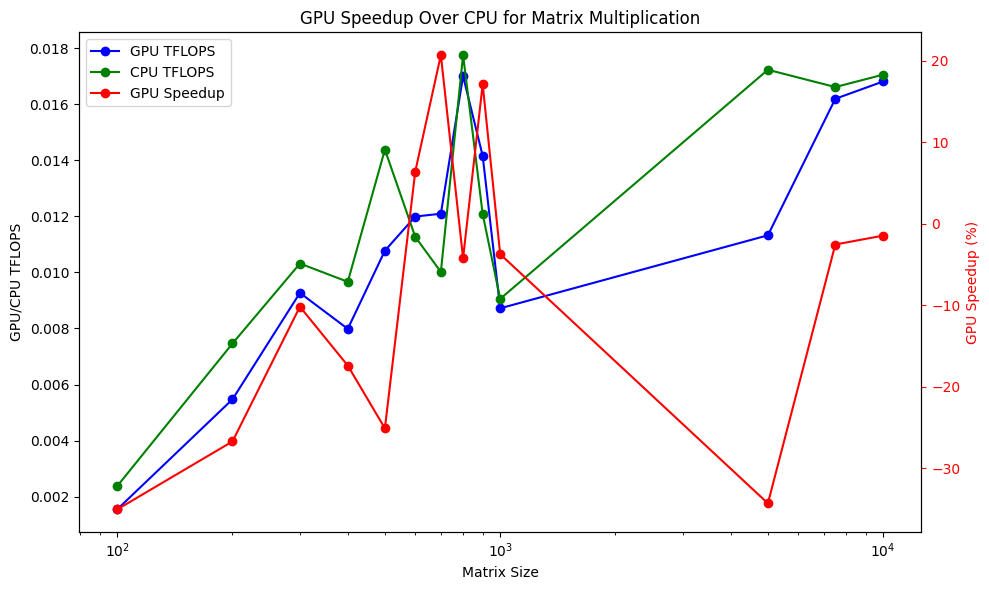

In [8]:
# Plotting the results with CPU and GPU TFLOPS, and Percentage Speedup
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot GPU TFLOPS on the primary y-axis
gpu_tflops_line, = ax1.plot(df['Matrix Size'], df['GPU TFLOPS'], marker='o', linestyle='-', color='blue', label='GPU TFLOPS')
cpu_tflops_line, = ax1.plot(df['Matrix Size'], df['CPU TFLOPS'], marker='o', linestyle='-', color='green', label='CPU TFLOPS')
ax1.set_xlabel('Matrix Size')
ax1.set_ylabel('GPU/CPU TFLOPS', color='black')
ax1.tick_params('y', colors='black')

# Create a secondary y-axis for Percentage Speedup
ax2 = ax1.twinx()
speedup_line, = ax2.plot(df['Matrix Size'], df['Percentage Speedup'], marker='o', linestyle='-', color='red', label='GPU Speedup')
ax2.set_ylabel('GPU Speedup (%)', color='red')
ax2.tick_params('y', colors='red')

# Add legend
lines = [gpu_tflops_line, cpu_tflops_line, speedup_line]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper left')

plt.xscale('log')  # Use a logarithmic scale for better visualization
plt.title('GPU Speedup Over CPU for Matrix Multiplication')
fig.tight_layout()
plt.show()

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import time


(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


def create_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


def train_model(device):
    with tf.device(device):
        model = create_model()
        start_time = time.time()
        model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))
        end_time = time.time()
        return end_time - start_time

cpu_time = train_model('/CPU:0')
print(f"Training Time on CPU: {cpu_time:.2f} seconds")

if tf.config.list_physical_devices('GPU'):
    gpu_time = train_model('/GPU:0')
    print(f"Training Time on GPU: {gpu_time:.2f} seconds")
else:
    print("GPU not available")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 115s 122ms/step - accuracy: 0.8843 - loss: 0.3898 - val_accuracy: 0.9800 - val_loss: 0.0603
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 148s 128ms/step - accuracy: 0.9829 - loss: 0.0550 - val_accuracy: 0.9894 - val_loss: 0.0348
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 116s 124ms/step - accuracy: 0.9887 - loss: 0.0349 - val_accuracy: 0.9904 - val_loss: 0.0301
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 116s 124ms/step - accuracy: 0.9912 - loss: 0.0285 - val_accuracy: 0.9883 - val_loss: 0.0383
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 119s 127ms/step - accuracy: 0.9934 - loss: 0.0214 - val_accuracy: 0.9896 - val_loss: 0.0331
Training Time on CPU: 613.82 seconds
GPU not available
